In [1]:
%matplotlib notebook
import firedrake 

In [2]:
mesh = firedrake.UnitSquareMesh(16,16)

In [3]:
help(mesh)

Help on MeshGeometry in module firedrake.mesh object:

class MeshGeometry(ufl.domain.Mesh)
 |  MeshGeometry(element)
 |  
 |  A representation of mesh topology and geometry.
 |  
 |  Method resolution order:
 |      MeshGeometry
 |      ufl.domain.Mesh
 |      ufl.domain.AbstractDomain
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __dir__(self)
 |      Default dir() implementation.
 |  
 |  __getattr__(self, name)
 |  
 |  __init__(self, coordinates)
 |      Initialise a mesh geometry from coordinates.
 |      
 |      :arg coordinates: a coordinateless function containing the coordinates
 |  
 |  cell_sizes(...)
 |      A :class`~.Function` in the :math:`P^1` space containing the local mesh size.
 |      
 |      This is computed by the :math:`L^2` projection of the local mesh element size.
 |  
 |  clear_cell_sizes(self)
 |      Reset the :attr:`cell_sizes` field on this mesh geometry.
 |      
 |      Use this if you move the mesh.
 |  
 |  clear_spatial_index(self

<IPython.core.display.Javascript object>


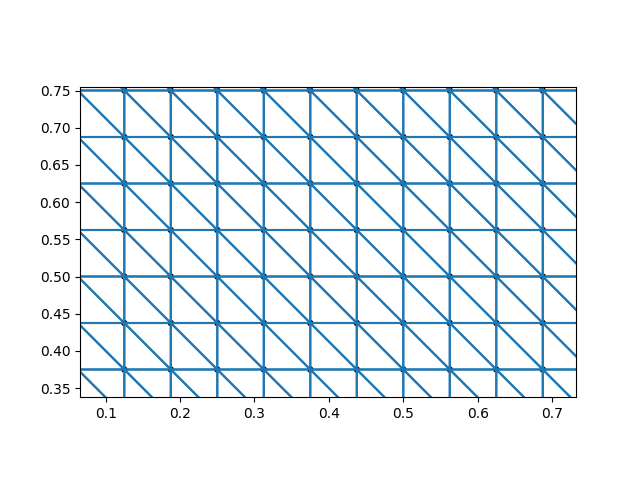

In [4]:
firedrake.plot(mesh)

In [5]:
x,y = firedrake.SpatialCoordinate(mesh)

In [6]:
F = x**2 + y**2

In [8]:
from firedrake import dx

In [9]:
firedrake.assemble(F * dx)

0.6666666666666666

In [10]:
from firedrake import ds # ds is just assembling over boundary

In [11]:
firedrake.assemble(firedrake.Constant(1,domain=mesh)*dx)

1.0

In [12]:
Q = firedrake.FunctionSpace(mesh,family='CG',degree=2)

In [13]:
f = firedrake.interpolate(F,Q)

<IPython.core.display.Javascript object>


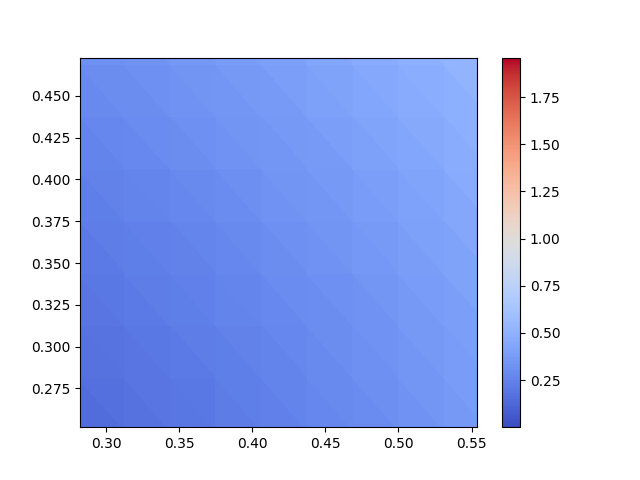

In [14]:
firedrake.plot(f)

In [17]:
f.dat.data_ro #this is a numpy array

array([9.76562500e-04, 1.95312500e-03, 9.76562500e-04, ...,
       1.93847656e+00, 1.93847656e+00, 2.00000000e+00])

In [18]:
g = firedrake.interpolate(firedrake.sin(x+y),Q)

<IPython.core.display.Javascript object>


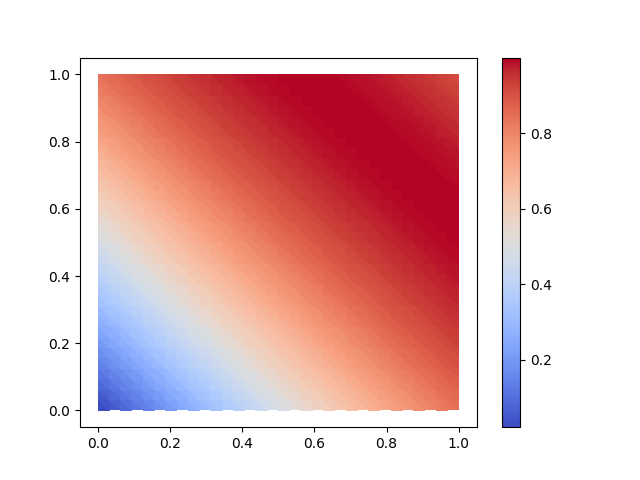

In [19]:
firedrake.plot(g)

In [20]:
#this can be used for integration and stuff

In [21]:
from firedrake import inner,grad
firedrake.assemble(inner(grad(f),grad(f)) * dx)

2.666666666666249

In [22]:
ν = firedrake.FacetNormal(mesh)
firedrake.assemble(inner(grad(f),ν)*ds)

3.9999999999996536